In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
def plot_3d(image, threshold=-300):
    
    verts, faces, _, _ = measure.marching_cubes(image, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, image.shape[0])
    ax.set_ylim(0, image.shape[1])
    ax.set_zlim(0, image.shape[2])

    plt.show()

def hist(ARRAY):
    plt.hist(ARRAY.flatten(), bins=80, color='c')
    plt.ylabel("Frequency")
    plt.show()

def array_stats(ARRAY):
    print ('Shape\t',ARRAY.shape)
    print ('Max\t',np.max(ARRAY))
    print ('Min\t',np.min(ARRAY))
    print ('Avg\t',np.mean(ARRAY))

# LUNA
___

In [3]:
import SimpleITK as sitk
from scipy import ndimage

def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpyImage = sitk.GetArrayFromImage(itkimage)
    numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))
    numpySpacing = np.array(list(reversed(itkimage.GetSpacing())))
    return numpyImage, numpyOrigin, numpySpacing

path_LUNA_raw = '../data/'

for directory in [d for d in os.listdir(path_LUNA_raw) if 'subset' in d][0:1]:
    directory = 'subset1'
    path_directory = path_LUNA_raw+directory+'/'
    luna_ids = [f.replace('.mhd','') for f in os.listdir(path_directory) if '.mhd' in f]
    print (directory,'contains',len(luna_ids),'patients')

    for patient in luna_ids[0:1]:
        patient = '1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886'
        img,origin,spacing = load_itk_image(path_directory+patient+'.mhd')
        print (img.shape)
        
def resize_voxel(x, desired_shape):
    factors = np.array(x.shape).astype('float32') / np.array(desired_shape).astype('float32')
    assert all(s > 1 for s in x.shape)
    output= ndimage.interpolation.zoom(x,1.0 / factors,order=1)
    assert output.shape == desired_shape,'resize error'
    return output

img = resize_voxel(img, img.shape)
img = np.clip(img, -1000, 400)
img = np.transpose(img, (2,1,0))
print ('Final shape',img.shape)

subset1 contains 89 patients
(123, 512, 512)
Final shape (512, 512, 123)


In [4]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(img[:,:,92], (1,0)), cmap=plt.cm.gray)
plt.axis('off')
plt.savefig('./figs/LUNA_slice.png', transparent=True, bbox_inches='tight')

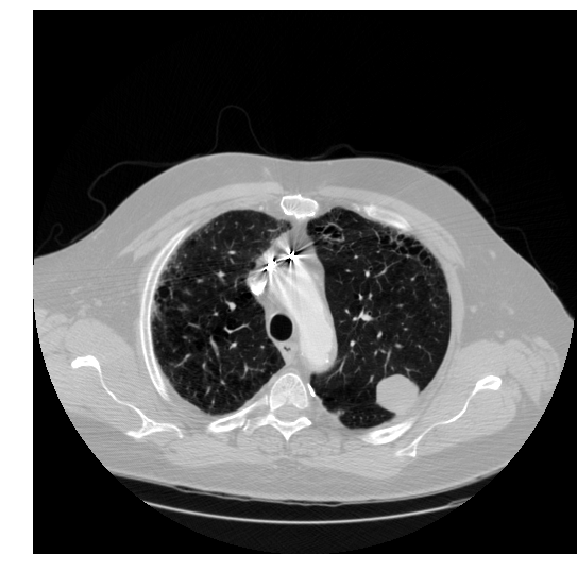

In [5]:
plt.show()

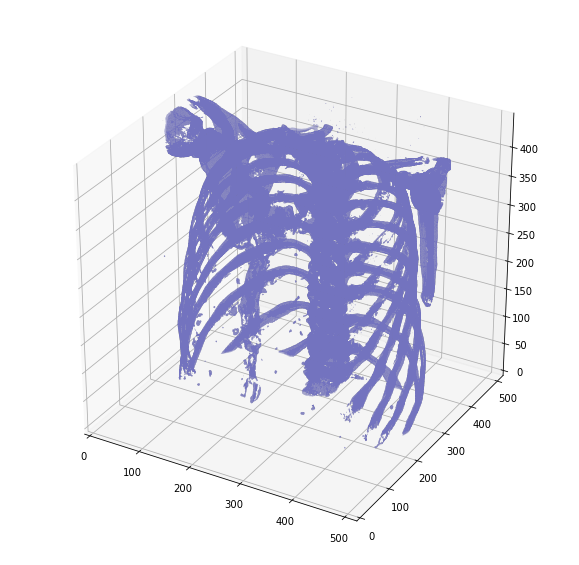

In [5]:
plot_3d(img,300)

# KAGGLE
___

In [6]:
path_Kaggle = '../data/stage1_arrays/'
patients_Kaggle = os.listdir(path_Kaggle)
nparray = np.load(path_Kaggle + 'ea7373271a2441b5864df2053c0f5c3e.npy')
print ('Rescaled shape',nparray.shape)

Rescaled shape (360, 360, 332)


In [7]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(nparray[:,:,239], (1,0)), cmap=plt.cm.gray)
plt.axis('off')
plt.savefig('./figs/Kaggle_slice.png', transparent=True, bbox_inches='tight')

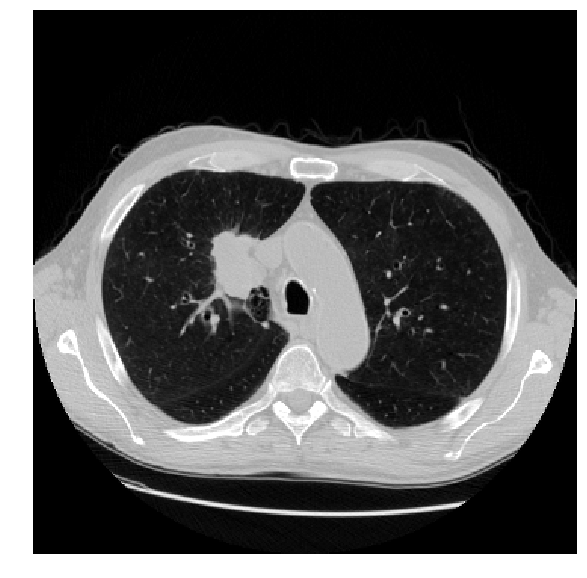

In [8]:
plt.show()

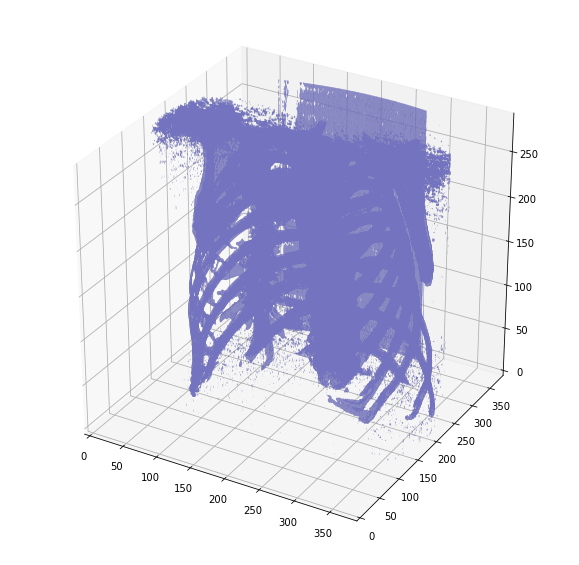

In [9]:
plot_3d(nparray,300)